# Problem Statement 
The cost of airline tickets varies due to multiple factors such as the day of travel, number of stops,
duration, airline, and route. Predicting flight prices can help travelers make informed booking decisions 
and airlines optimize pricing strategies.
Developed a machine learning model to predict flight ticket prices based on key flight attributes, including departure time, journey date, route, airline, duration, total stops, and additional information. Additionally, I have  analyzed price variations based on weekdays vs. weekends, total stops, and airline performance.

# Data Loading and Cleaning 

In [1]:
import pandas as pd 
df_train=pd.read_excel("C:\\Users\\hariharan\\Downloads\\Data_Train.xlsx") 
print("Train Data:\n",df_train)  
df_test=pd.read_excel("C:\\Users\\hariharan\\Downloads\\Test_set.xlsx")
print("Test Data:\n",df_test)   

Train Data:
            Airline Date_of_Journey    Source Destination  \
0           IndiGo      24/03/2019  Banglore   New Delhi   
1        Air India       1/05/2019   Kolkata    Banglore   
2      Jet Airways       9/06/2019     Delhi      Cochin   
3           IndiGo      12/05/2019   Kolkata    Banglore   
4           IndiGo      01/03/2019  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI → BLR    05:50         13:15   7h 25m     2 stops   
2      DEL → LKO → BOM → COK    09:25 

In [3]:
df_train.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df_test.head() 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
print("Train Data Missing Value:\n",df_train.isnull().sum()) 
print("Test Data Missing Value:\n",df_test.isnull().sum()) 

Train Data Missing Value:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
Test Data Missing Value:
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [9]:
print("Data Types:\n",df_train.dtypes) 

Data Types:
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [11]:
print("Summary Statistics:\n",df_train.describe()) 

Summary Statistics:
               Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [13]:
print("Duplicate Rows in train data :\n",df_train.duplicated().sum()) 
print("Duplicate Rows in test data :\n",df_test.duplicated().sum()) 

Duplicate Rows in train data :
 220
Duplicate Rows in test data :
 26


In [15]:
df_train = df_train.drop_duplicates()
df_test = df_test.drop_duplicates()

In [17]:
print("Duplicate Rows in train data after cleaning:", df_train.duplicated().sum()) 
print("Duplicate Rows in test data after cleaning:", df_test.duplicated().sum())


Duplicate Rows in train data after cleaning: 0
Duplicate Rows in test data after cleaning: 0


# Feature Engineering 

In [20]:
import pandas as pd 
df_train["Date_of_Journey"]=pd.to_datetime(df_train["Date_of_Journey"],format="%d/%m/%Y") 
df_test["Date_of_Journey"]=pd.to_datetime(df_test["Date_of_Journey"],format="%d/%m/%Y") 

In [22]:
df_train.head(2) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [24]:
df_train["Day"]=df_train["Date_of_Journey"].dt.day 
df_train["Month"]=df_train["Date_of_Journey"].dt.month
df_train["Year"]=df_train["Date_of_Journey"].dt.year 

In [26]:
df_test["Day"]=df_test["Date_of_Journey"].dt.day 
df_test["Month"]=df_test["Date_of_Journey"].dt.month
df_test["Year"]=df_test["Date_of_Journey"].dt.year 


In [28]:
df_train.drop(columns=["Date_of_Journey"],inplace=True) 
df_test.drop(columns=["Date_of_Journey"],inplace=True) 

In [30]:
df_train.head(2) 

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019


In [32]:

df_test.head(2) 

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6,2019
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5,2019


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder() 
for col in ['Airline','Source','Destination','Additional_Info']: 
    df_train[col]=label_encoder.fit_transform(df_train[col]) 
    df_test[col]=label_encoder.fit_transform(df_test[col]) 

In [35]:
df_train.head(2) 

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897,24,3,2019
1,1,3,0,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,8,7662,1,5,2019


In [38]:
def extract_route_features(df):
    df['Route'] = df['Route'].fillna('') 
    df['First_Route'] = df['Route'].apply(lambda x: str(x).split('→')[0].strip() if isinstance(x, str) else '')
    df['Last_Route'] = df['Route'].apply(lambda x: str(x).split('→')[-1].strip() if isinstance(x, str) else '')
    df.drop(['Route'], axis=1, inplace=True)
extract_route_features(df_train)
extract_route_features(df_test) 

In [40]:
df_train.head()  

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,First_Route,Last_Route
0,3,0,5,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897,24,3,2019,BLR,DEL
1,1,3,0,05:50,13:15,7h 25m,2 stops,8,7662,1,5,2019,CCU,BLR
2,4,2,1,09:25,04:25 10 Jun,19h,2 stops,8,13882,9,6,2019,DEL,COK
3,3,3,0,18:05,23:30,5h 25m,1 stop,8,6218,12,5,2019,CCU,BLR
4,3,0,5,16:50,21:35,4h 45m,1 stop,8,13302,1,3,2019,BLR,DEL


In [42]:
df_test.head() 

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year,First_Route,Last_Route
0,4,2,1,17:30,04:25 07 Jun,10h 55m,1 stop,5,6,6,2019,DEL,COK
1,3,3,0,06:20,10:20,4h,1 stop,5,12,5,2019,CCU,BLR
2,4,2,1,19:15,19:00 22 May,23h 45m,1 stop,3,21,5,2019,DEL,COK
3,6,2,1,08:00,21:00,13h,1 stop,5,21,5,2019,DEL,COK
4,0,0,2,23:55,02:45 25 Jun,2h 50m,non-stop,5,24,6,2019,BLR,DEL


In [44]:
from sklearn.preprocessing import LabelEncoder
columns = ['First_Route', 'Last_Route']
encoders = {}
for col in columns:
    le = LabelEncoder()
    df_train[col] = le.fit_transform(df_train[col])
    encoders[col] = le  
    df_test[col] = df_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


In [46]:
df_train.head() 

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,First_Route,Last_Route
0,3,0,5,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897,24,3,2019,1,4
1,1,3,0,05:50,13:15,7h 25m,2 stops,8,7662,1,5,2019,3,1
2,4,2,1,09:25,04:25 10 Jun,19h,2 stops,8,13882,9,6,2019,4,3
3,3,3,0,18:05,23:30,5h 25m,1 stop,8,6218,12,5,2019,3,1
4,3,0,5,16:50,21:35,4h 45m,1 stop,8,13302,1,3,2019,1,4


In [48]:
df_train.drop(columns=['First_Route','Last_Route']).head() 

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,3,0,5,22:20,01:10 22 Mar,2h 50m,non-stop,8,3897,24,3,2019
1,1,3,0,05:50,13:15,7h 25m,2 stops,8,7662,1,5,2019
2,4,2,1,09:25,04:25 10 Jun,19h,2 stops,8,13882,9,6,2019
3,3,3,0,18:05,23:30,5h 25m,1 stop,8,6218,12,5,2019
4,3,0,5,16:50,21:35,4h 45m,1 stop,8,13302,1,3,2019


In [50]:
df_test.drop(columns=['First_Route','Last_Route']).head() 

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day,Month,Year
0,4,2,1,17:30,04:25 07 Jun,10h 55m,1 stop,5,6,6,2019
1,3,3,0,06:20,10:20,4h,1 stop,5,12,5,2019
2,4,2,1,19:15,19:00 22 May,23h 45m,1 stop,3,21,5,2019
3,6,2,1,08:00,21:00,13h,1 stop,5,21,5,2019
4,0,0,2,23:55,02:45 25 Jun,2h 50m,non-stop,5,24,6,2019


In [52]:
df_train['Dep_Hour'] = pd.to_datetime(df_train['Dep_Time'], format='%H:%M').dt.hour
df_train['Dep_Min'] = pd.to_datetime(df_train['Dep_Time'], format='%H:%M').dt.minute 

In [54]:
df_test['Dep_Hour'] = pd.to_datetime(df_test['Dep_Time'], format='%H:%M').dt.hour
df_test['Dep_Min'] = pd.to_datetime(df_test['Dep_Time'], format='%H:%M').dt.minute 

In [56]:
df_train['Arrival_Time'] = df_train['Arrival_Time'].str.split().str[0]  
df_train['Arrival_Hour'] = pd.to_datetime(df_train['Arrival_Time'], format='%H:%M').dt.hour
df_train['Arrival_Min'] = pd.to_datetime(df_train['Arrival_Time'], format='%H:%M').dt.minute 

In [58]:
df_test['Arrival_Time'] = df_test['Arrival_Time'].str.split().str[0]  
df_test['Arrival_Hour'] = pd.to_datetime(df_test['Arrival_Time'], format='%H:%M').dt.hour
df_test['Arrival_Min'] = pd.to_datetime(df_test['Arrival_Time'], format='%H:%M').dt.minute  

In [60]:
df_train['Duration_Minutes'] = df_train['Duration'].apply(lambda x: 
    int(x.split('h')[0]) * 60 + int(x.split('h')[1].replace('m', '')) if 'h' in x and 'm' in x else 
    int(x.replace('m', '')) if 'm' in x else int(x.replace('h', '')) * 60)
df_train['Duration_Hours'] = df_train['Duration_Minutes'] // 60


In [62]:
df_test['Duration_Minutes'] = df_test['Duration'].apply(lambda x: 
    int(x.split('h')[0]) * 60 + int(x.split('h')[1].replace('m', '')) if 'h' in x and 'm' in x else 
    int(x.replace('m', '')) if 'm' in x else int(x.replace('h', '')) * 60)
df_test['Duration_Hours'] = df_test['Duration_Minutes'] // 60


In [64]:
df_train.drop(columns=['Dep_Time','Arrival_Time','Duration'], inplace=True) 

In [66]:
df_test.drop(columns=['Dep_Time','Arrival_Time','Duration'],inplace=True) 

In [68]:
df_train.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,3,0,5,non-stop,8,3897,24,3,2019,1,4,22,20,1,10,170,2
1,1,3,0,2 stops,8,7662,1,5,2019,3,1,5,50,13,15,445,7
2,4,2,1,2 stops,8,13882,9,6,2019,4,3,9,25,4,25,1140,19
3,3,3,0,1 stop,8,6218,12,5,2019,3,1,18,5,23,30,325,5
4,3,0,5,1 stop,8,13302,1,3,2019,1,4,16,50,21,35,285,4


In [70]:
df_test.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,4,2,1,1 stop,5,6,6,2019,4,3,17,30,4,25,655,10
1,3,3,0,1 stop,5,12,5,2019,3,1,6,20,10,20,240,4
2,4,2,1,1 stop,3,21,5,2019,4,3,19,15,19,0,1425,23
3,6,2,1,1 stop,5,21,5,2019,4,3,8,0,21,0,780,13
4,0,0,2,non-stop,5,24,6,2019,1,4,23,55,2,45,170,2


In [72]:
df_train['Total_Stops'] = df_train['Total_Stops'].replace(
    {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
).infer_objects(copy=False)  
df_train['Total_Stops'] = df_train['Total_Stops'].fillna(0).astype(int)


C:\Users\hariharan\AppData\Local\Temp\ipykernel_6780\512896619.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train['Total_Stops'] = df_train['Total_Stops'].replace(


In [74]:
df_train.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,3,0,5,0,8,3897,24,3,2019,1,4,22,20,1,10,170,2
1,1,3,0,2,8,7662,1,5,2019,3,1,5,50,13,15,445,7
2,4,2,1,2,8,13882,9,6,2019,4,3,9,25,4,25,1140,19
3,3,3,0,1,8,6218,12,5,2019,3,1,18,5,23,30,325,5
4,3,0,5,1,8,13302,1,3,2019,1,4,16,50,21,35,285,4


In [76]:
df_test['Total_Stops'] = df_test['Total_Stops'].replace(
    {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
) 
df_test['Total_Stops'] = df_test['Total_Stops'].fillna(0).astype(int)  

C:\Users\hariharan\AppData\Local\Temp\ipykernel_6780\550665820.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test['Total_Stops'] = df_test['Total_Stops'].replace(


In [78]:
df_test.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,4,2,1,1,5,6,6,2019,4,3,17,30,4,25,655,10
1,3,3,0,1,5,12,5,2019,3,1,6,20,10,20,240,4
2,4,2,1,1,3,21,5,2019,4,3,19,15,19,0,1425,23
3,6,2,1,1,5,21,5,2019,4,3,8,0,21,0,780,13
4,0,0,2,0,5,24,6,2019,1,4,23,55,2,45,170,2


# Transformed Data 

In [81]:
df_train.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,3,0,5,0,8,3897,24,3,2019,1,4,22,20,1,10,170,2
1,1,3,0,2,8,7662,1,5,2019,3,1,5,50,13,15,445,7
2,4,2,1,2,8,13882,9,6,2019,4,3,9,25,4,25,1140,19
3,3,3,0,1,8,6218,12,5,2019,3,1,18,5,23,30,325,5
4,3,0,5,1,8,13302,1,3,2019,1,4,16,50,21,35,285,4


In [83]:
df_test.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,Year,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,4,2,1,1,5,6,6,2019,4,3,17,30,4,25,655,10
1,3,3,0,1,5,12,5,2019,3,1,6,20,10,20,240,4
2,4,2,1,1,3,21,5,2019,4,3,19,15,19,0,1425,23
3,6,2,1,1,5,21,5,2019,4,3,8,0,21,0,780,13
4,0,0,2,0,5,24,6,2019,1,4,23,55,2,45,170,2


# Analysis

# Weekday vs Weekend price variation 

In [104]:
import pandas as pd
df_train['Date_of_Journey'] = pd.to_datetime(df_train[['Day', 'Month', 'Year']])
df_train['Day_of_Week'] = df_train['Date_of_Journey'].dt.day_name()
df_train['Weekend'] = df_train['Day_of_Week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)
price_comparison = df_train.groupby("Weekend")["Price"].agg(["mean", "median", "min", "max", "count"])
price_comparison.index = ["Weekday", "Weekend"]
print("\n--- Flight Price Summary: Weekday vs. Weekend ---")
print(price_comparison)


--- Flight Price Summary: Weekday vs. Weekend ---
                mean  median   min    max  count
Weekday  8960.603843  8040.0  1759  79512   7391
Weekend  9185.526367  8610.0  1965  46490   3072


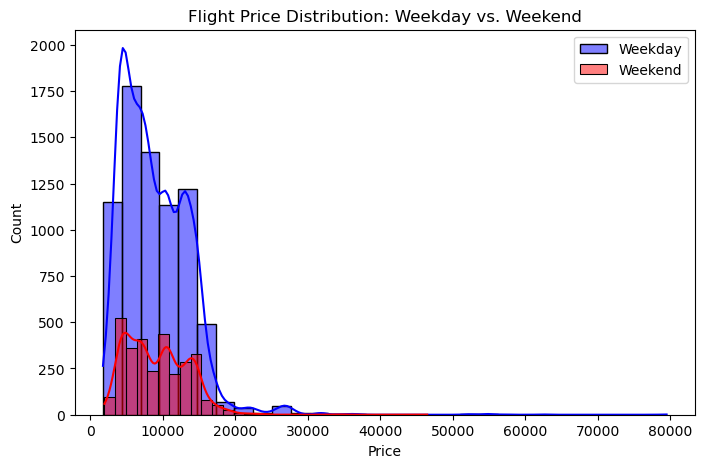

In [106]:
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(8, 5))
sns.histplot(df_train[df_train['Weekend'] == 0]['Price'], color='blue', label='Weekday', kde=True, bins=30)
sns.histplot(df_train[df_train['Weekend'] == 1]['Price'], color='red', label='Weekend', kde=True, bins=30)
plt.title("Flight Price Distribution: Weekday vs. Weekend")
plt.xlabel("Price")
plt.ylabel("Count")
plt.legend()
plt.show() 

# INSIGHTS 
* Weekend flights are slightly more expensive, likely due to higher demand.
* The maximum price for weekday flights is much higher, possibly due to last-minute bookings or premium flights.
* Weekend flights have a more stable pricing range . 


# Price variation based on  Total Stops 

In [110]:
stop_price = df_train.groupby("Total_Stops")["Price"].agg(["mean", "median", "min", "max", "count"])
print("\n--- Flight Price Summary by Total Stops ---")
print(stop_price)


--- Flight Price Summary by Total Stops ---
                     mean   median    min    max  count
Total_Stops                                            
0             5019.214902   4667.0   1759  31945   3476
1            10594.123556  10262.0   3480  79512   5625
2            12761.099393  12723.0   4647  52285   1318
3            13260.674419  13007.0   8607  21829     43
4            17686.000000  17686.0  17686  17686      1


Text(0, 0.5, 'Price')

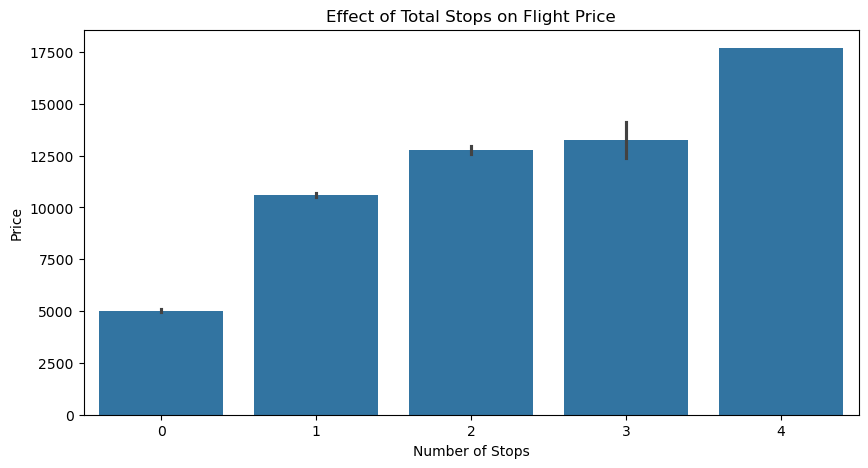

In [112]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Total_Stops", y="Price", data=df_train)
plt.title("Effect of Total Stops on Flight Price")
plt.xlabel("Number of Stops")
plt.ylabel("Price") 

# Insights 
* Non-stop flights are the cheapest, while flights with more stops cost significantly more
* 1-Stop Flights Have the Highest Price Variation
* 3 and 4-Stop Flights Are Rare But Expensive
* Outliers in 1-Stop Flights

# Airline Performance variation by Price 

In [116]:
airline_prices = df_train.groupby("Airline")["Price"].agg(["mean", "median", "min", "max", "count"]).sort_values("mean")
print("\n--- Airline Performance (Price Analysis) ---")
print(airline_prices)
cheapest_airline = airline_prices['mean'].idxmin()
expensive_airline = airline_prices['mean'].idxmax()
print(f"\nCheapest airline: {cheapest_airline}")
print(f"Most expensive airline: {expensive_airline}")
airline_counts = df_train["Airline"].value_counts()
print("\n--- Airline Flight Frequency ---")
print(airline_counts)


--- Airline Performance (Price Analysis) ---
                 mean   median    min    max  count
Airline                                            
9         4140.000000   4140.0   4140   4140      1
8         4335.841718   3873.0   1759  23267    815
0         5590.260188   5162.0   3383  13774    319
3         5668.469897   5000.0   2227  22153   2043
2         5861.056701   5135.0   3398  22794    194
10        7801.355649   7980.0   3687  21730    478
11        8962.333333   9125.0   5969  11793      3
1         9555.382891   9292.0   2050  31945   1695
6        10902.678094  10197.0   5797  36983   1196
7        11418.846154  11269.0   9845  14629     13
4        11599.021081  11134.0   1840  54826   3700
5        58358.666667  54747.0  46490  79512      6

Cheapest airline: 9
Most expensive airline: 5

--- Airline Flight Frequency ---
Airline
4     3700
3     2043
1     1695
6     1196
8      815
10     478
0      319
2      194
7       13
5        6
11       3
9        1
Name:

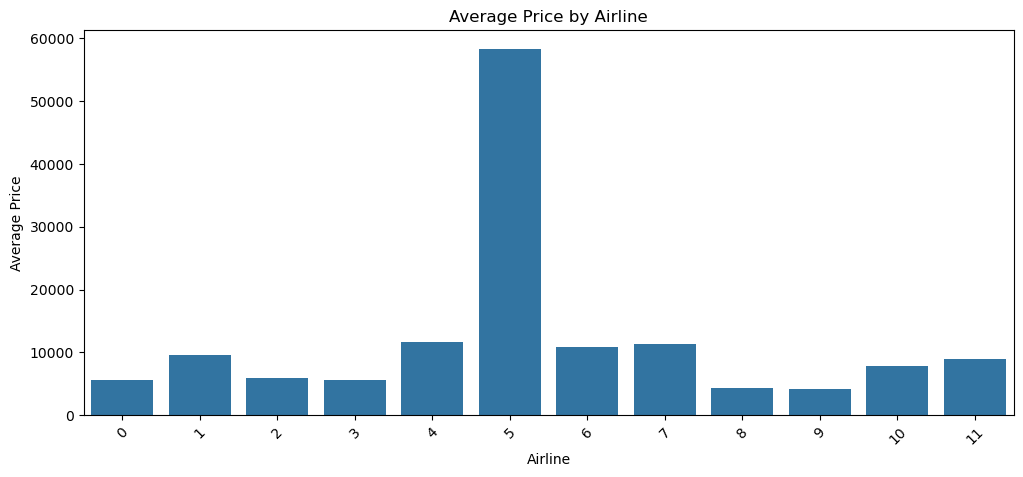

In [118]:
airline_price = df_train.groupby("Airline")["Price"].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=airline_price.index, y=airline_price.values)
plt.xticks(rotation=45)
plt.title("Average Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price")
plt.show()


# Insights 
* Huge Price Variation in Cheapest airline (₹4,140) vs. most expensive (₹58,358).
* Frequent Airlines , Airline 4 (3,700 flights) & Airline 3 (2,043 flights) dominate.


# Scaling 

In [86]:
df_train.drop(columns=['Year'], inplace=True)
df_test.drop(columns=['Year'], inplace=True) 

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[['Duration_Minutes', 'Duration_Hours']] = scaler.fit_transform(df_train[['Duration_Minutes', 'Duration_Hours']]) 
df_test[['Duration_Minutes', 'Duration_Hours']] = scaler.transform(df_test[['Duration_Minutes', 'Duration_Hours']])
if 'Price' in df_train.columns:
    price_scaler = StandardScaler()
    df_train['Price'] = price_scaler.fit_transform(df_train[['Price']])


In [90]:
df_train.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,3,0,5,0,8,-1.109248,24,3,1,4,22,20,1,10,-0.918409,-0.958135
1,1,3,0,2,8,-0.295094,1,5,3,1,5,50,13,15,-0.369189,-0.361347
2,4,2,1,2,8,1.049936,9,6,4,3,9,25,4,25,1.018837,1.070945
3,3,3,0,1,8,-0.607349,12,5,3,1,18,5,23,30,-0.608849,-0.600062
4,3,0,5,1,8,0.924515,1,3,1,4,16,50,21,35,-0.688735,-0.719420


In [92]:
df_test[['Duration_Minutes', 'Duration_Hours']] = scaler.transform(df_test[['Duration_Minutes', 'Duration_Hours']]) 

In [94]:
df_test.head() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Day,Month,First_Route,Last_Route,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min,Duration_Minutes,Duration_Hours
0,4,2,1,1,5,6,6,4,3,17,30,4,25,-1.257826,-1.197241
1,3,3,0,1,5,12,5,3,1,6,20,10,20,-1.259481,-1.282719
2,4,2,1,1,3,21,5,4,3,19,15,19,0,-1.254754,-1.012040
3,6,2,1,1,5,21,5,4,3,8,0,21,0,-1.257327,-1.154502
4,0,0,2,0,5,24,6,1,4,23,55,2,45,-1.259760,-1.311211


# Linear regression 

In [97]:
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
X=df_train.drop(columns=["Price"]) 
y=df_train["Price"]

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 

In [101]:
scaler=StandardScaler() 
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test) 

In [103]:
model_linear=LinearRegression() 
model_linear.fit(X_train_scaled,y_train) 
y_pred_lr=model_linear.predict(X_test_scaled) 

In [105]:
#evalution 
mae_linear=mean_absolute_error(y_test,y_pred_lr)
mse_linear=mean_squared_error(y_test,y_pred_lr) 
rmse_linear=np.sqrt(mse_linear) 
r2 = r2_score(y_test, y_pred_lr)  
print("\n---LinearRegressor----") 

print("MAE :",mae_linear)
print("MSE :",mse_linear)
print("RMSE:",rmse_linear) 
print("R2:",r2) 




---LinearRegressor----
MAE : 0.5277500486240443
MSE : 0.5395806865265643
RMSE: 0.7345615607466568
R2: 0.44695404168129016


# Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [110]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns) 

In [112]:
model_decision=DecisionTreeRegressor(random_state=42)
model_decision.fit(X_train,y_train) 

DecisionTreeRegressor(random_state=42)

In [114]:
y_pred_dt=model_decision.predict(X_test_scaled) 

In [116]:
from sklearn.model_selection import GridSearchCV
param_grid_decision = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}
grid_search = GridSearchCV(model_decision, param_grid_decision, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

best_dt = grid_search.best_estimator_

# Make predictions
y_pred_dt = best_dt.predict(X_test_scaled) 

In [117]:
mae_decision = mean_absolute_error(y_test, y_pred_dt)
mse_decision = mean_squared_error(y_test, y_pred_dt)
rmse_decision = np.sqrt(mse_decision)
r2_decision = r2_score(y_test, y_pred_dt)

# Print results
print("\n---DecisionTree---") 
print("Best Parameters:", grid_search.best_params_)
print("MAE:", mae_decision)
print("MSE:", mse_decision)
print("RMSE:", rmse_decision)
print("R² Score:", r2_decision)


---DecisionTree---
Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 20}
MAE: 0.1852887697558936
MSE: 0.17481040399394202
RMSE: 0.4181033412853119
R² Score: 0.8208271907891002


# RANDOM FOREST 

In [120]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=100, random_state=42)
model_random.fit(X_train_scaled, y_train) 

RandomForestRegressor(random_state=42)

In [122]:
y_pred_rf=model_random.predict(X_test_scaled) 

In [124]:
mae_random = mean_absolute_error(y_test, y_pred_rf)
mse_random = mean_squared_error(y_test, y_pred_rf)
rmse_random = np.sqrt(mse_random)
r2_random  = r2_score(y_test, y_pred_rf)
print("\n--- Random Forest ---")
print("MAE:", mae_random)
print("MSE:", mse_random)
print("RMSE:", rmse_random)
print("R² Score:", r2_random) 



--- Random Forest ---
MAE: 0.14449429599112706
MSE: 0.10566217392472894
RMSE: 0.3250571856223593
R² Score: 0.8917010195223823


# XGBOOST 

In [127]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [129]:
y_pred_xg=model_xgb.predict(X_test_scaled) 

In [131]:
mae_xgb = mean_absolute_error(y_test, y_pred_xg)
mse_xgb = mean_squared_error(y_test, y_pred_xg)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb  = r2_score(y_test, y_pred_xg)
print("\n--- XGBoost ---")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb) 


--- XGBoost ---
MAE: 0.19327901421455718
MSE: 0.12057814989442016
RMSE: 0.34724364629812904
R² Score: 0.8764128143838343


In [133]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

grid_search_xgb = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='r2', n_jobs=-1)
grid_search_xgb.fit(X_train_scaled, y_train)

best_xgb = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test_scaled)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Improved R² Score:", r2_score(y_test, y_pred_best_xgb)) 

Best Parameters for XGBoost: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Improved R² Score: 0.892243980587458


# GradientBoostingRegressor

In [156]:
from sklearn.ensemble import GradientBoostingRegressor
model_gradient= GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model_gradient.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [158]:
y_pred_gb=model_gradient.predict(X_test_scaled) 

In [160]:
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb  = r2_score(y_test, y_pred_gb)
print("\n--- GradientBoostingRegressor ---")
print("MAE:", mae_xgb)
print("MSE:", mse_xgb)
print("RMSE:", rmse_xgb)
print("R² Score:", r2_xgb) 


--- GradientBoostingRegressor ---
MAE: 0.19327901421455718
MSE: 0.12057814989442016
RMSE: 0.34724364629812904
R² Score: 0.8764128143838343


# SUPPORT VECTOR MACHINE

In [164]:
from sklearn.svm import SVR
model_svm = SVR(kernel='rbf')
model_svm.fit(X_train_scaled, y_train) 

SVR()

In [166]:
y_pred_svm=model_svm.predict(X_test_scaled) 

In [167]:
mae_svm= mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y_test, y_pred_svm)
print("\n--- SupportVectorMachine ---")
print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("R² Score:", r2_svm)   


--- SupportVectorMachine ---
MAE: 0.2850633644990632
MSE: 0.2518189926916687
RMSE: 0.5018156959399225
R² Score: 0.7418968476567966


# KNN

In [136]:
from sklearn.neighbors import KNeighborsRegressor
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
} 
knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='r2', n_jobs=-1)
grid_search_knn.fit(X_train_scaled, y_train)

best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test_scaled)

mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("\n---K-NearestNeighborRegression----")
print("Best Parameters for KNN:", grid_search_knn.best_params_)
print("MAE:", mae_knn)
print("MSE:", mse_knn)
print("RMSE:", rmse_knn)
print("R² Score:", r2_knn) 


---K-NearestNeighborRegression----
Best Parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
MAE: 0.2022605220465399
MSE: 0.17373145292362127
RMSE: 0.41681105182519007
R² Score: 0.8219330671548866


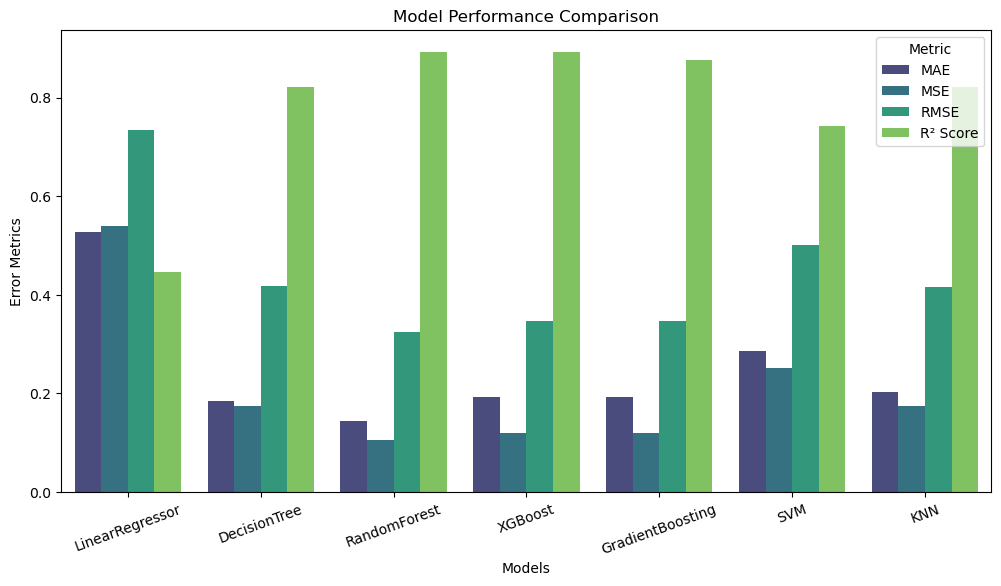

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
models = ['LinearRegressor', 'DecisionTree', 'RandomForest', 'XGBoost', 'GradientBoosting', 'SVM', 'KNN']
mae = [0.5278, 0.1853, 0.1445, 0.1933, 0.1933, 0.2851, 0.2023]
mse = [0.5396, 0.1748, 0.1057, 0.1206, 0.1206, 0.2518, 0.1737]
rmse = [0.7346, 0.4181, 0.3251, 0.3472, 0.3472, 0.5018, 0.4168]
r2_score = [0.4469, 0.8208, 0.8917, 0.8922, 0.8764, 0.7419, 0.8219]
plt.figure(figsize=(12, 6))
df_melted = df.melt(id_vars=['Model'], var_name='Metric', value_name='Value')
sns.barplot(x='Model', y='Value', hue='Metric', data=df_melted, palette='viridis')
plt.xticks(rotation=20)
plt.title('Model Performance Comparison')
plt.ylabel('Error Metrics')
plt.xlabel('Models')
plt.legend(title='Metric')
plt.show()

In [146]:
df = pd.DataFrame({'Model': models, 'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R² Score': r2_score})
print(df)

              Model     MAE     MSE    RMSE  R² Score
0   LinearRegressor  0.5278  0.5396  0.7346    0.4469
1      DecisionTree  0.1853  0.1748  0.4181    0.8208
2      RandomForest  0.1445  0.1057  0.3251    0.8917
3           XGBoost  0.1933  0.1206  0.3472    0.8922
4  GradientBoosting  0.1933  0.1206  0.3472    0.8764
5               SVM  0.2851  0.2518  0.5018    0.7419
6               KNN  0.2023  0.1737  0.4168    0.8219


#  Best Model: Random Forest
* MAE: 0.1445 (Lower error , better accuracy)
* MSE: 0.1057 (Lower value indicates fewer large deviations)
* RMSE: 0.3251 (Lower ,  better generalization)
* R² Score: 0.8917 (High score ,  better prediction ability)
* Random Forest has the best balance of low error (MAE, MSE, RMSE) and high R² Score, making it the best model.
